In [2]:
# Imports
import pandas as pd
import plotly.express as px

In [3]:
# load the dataset
FILE_PATH = './dataset/data-01'

df = pd.read_csv(FILE_PATH, delim_whitespace=True, header=None)

# codes key-value pairs can be found in codes.csv
df.columns = ['Date', 'Time', 'Code', 'BG']
df.head()

,Date,Time,Code,BG
0,04-21-1991,9:09,58,100
1,04-21-1991,9:09,33,9
2,04-21-1991,9:09,34,13
3,04-21-1991,17:08,62,119
4,04-21-1991,17:08,33,7


# Data Cleaning
First off, we want to drop any empty rows, since a code reading without a BG value is of no use to us. Next, we want to combine the date and time columns into one so we can build a time sequence later on.

In [4]:
# cleanup
df = df.dropna()

# combine date and time
df['DateTime'] = df['Date'] + ' ' + df['Time']
df['DateTime'] = pd.to_datetime(df['DateTime'])
df = df.drop(['Date', 'Time'], axis=1)

df.head()

,Code,BG,DateTime
0,58,100,1991-04-21 09:09:00
1,33,9,1991-04-21 09:09:00
2,34,13,1991-04-21 09:09:00
3,62,119,1991-04-21 17:08:00
4,33,7,1991-04-21 17:08:00


## How often does each code appear?

In [5]:
df["Code"].value_counts()

Code
33    384
34    139
58    135
62    102
48     78
60     54
65     51
Name: count, dtype: int64

## How often does each blood sugar reading occur?

In [6]:
df["BG"].value_counts(sort=True)

BG
7      87
16     76
4      53
0      51
10     45
       ..
287     1
227     1
120     1
313     1
155     1
Name: count, Length: 220, dtype: int64

# Why do values under 70 occur so often?
In the notes for this dataset, the researcher explains how BG levels under 70 are considered signs of hyperglycemia, which is a deadly drop in sugar. Looking at our analysis, we see quite a few values close to 0, which typically corresponds to code 33 for a regular insuln dose. The dataset info does not explain why they mark it for this patient as 0, but there is a potential for it being a placeholder for a NaN value. Taking this into account, lets remove all readings below 40 to feed out any descrepencies we may have. 

In [7]:
df = df[df['BG'] > 40]
df['BG'].describe()

count    369.000000
mean     159.552846
std       68.828418
min       43.000000
25%      103.000000
50%      149.000000
75%      207.000000
max      343.000000
Name: BG, dtype: float64

# Visualization

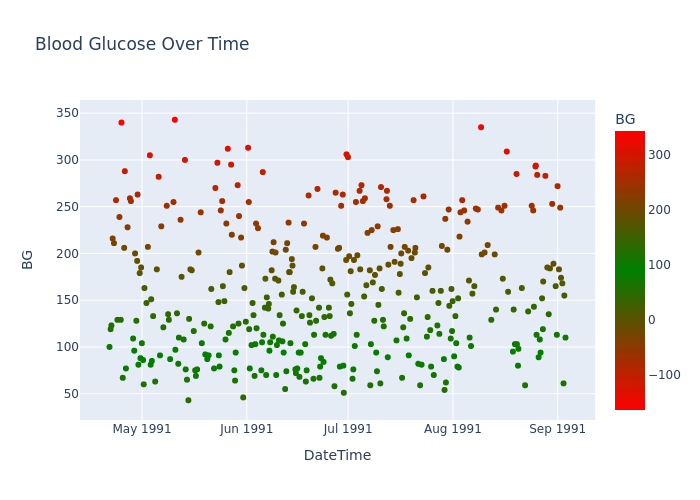

In [8]:
fig = px.scatter(df, x='DateTime', y='BG', title='Blood Glucose Over Time', color='BG', color_continuous_scale=[(0, "red"), (0.5,"green"), (1.0,"red")], color_continuous_midpoint=90)
fig.show("png")

## What percent of time is paitent 01 in the normal range for BG?

In [9]:
normal = df[(df['BG'] >= 70) & (df['BG'] <= 140)]
normal_percent = len(normal) / len(df) * 100
print(f"{normal_percent:.2f}% of the time the blood glucose is in the normal range for this patient")

39.30% of the time the blood glucose is in the normal range for this patient
